<a href="https://colab.research.google.com/github/Chiragnagori/LGMVIP/blob/master/LGM_MNIST_Handwritten_Digit_Recognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist
import keras

In [2]:
#mnist  : in this we have precreated dataset of digit
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
#60000 : images we have of 28 x 28
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
#batch size : images we put to train in one go
#epoches: 
#from keras import utils as np_utils
from keras.utils import np_utils
batch_size = 128
num_classes = 10
epochs = 25
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize to 0 to 1 range
X_train /= 255
X_test /= 255

print('Number of images in training Set: ', X_train.shape[0], )
print('Number of images in training Set: ', X_test.shape[0], )
# convert class vectors to binary class matrices
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)


print('Training set size:', X_train.shape)
print('Testing set size:', X_test.shape)
print('Training label size;',y_train.shape)
print('testing  label size;',y_test.shape)

Number of images in training Set:  60000
Number of images in training Set:  10000
Training set size: (60000, 784)
Testing set size: (10000, 784)
Training label size; (60000, 10)
testing  label size; (10000, 10)


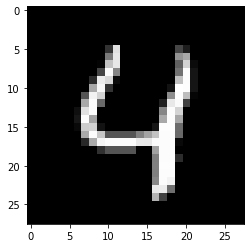

In [6]:
plt.imshow(X_test[4:5].reshape(28,28), cmap='gray')
plt.show()

In [7]:
#labels are in form of onehotEncoding

print("Label:",y_test[4:5])


Label: [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


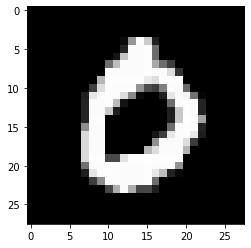

In [8]:
plt.imshow(X_test[3:4].reshape(28,28), cmap='gray')
plt.show()

In [9]:
print("Label:",y_test[3:4])


Label: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [10]:
# NN Model structure
from keras.models import Sequential
from keras.layers import Dense

first_layer_size = 100
model = Sequential()
#input_shape=(784,))) : our image size is 28x28
model.add(Dense(first_layer_size, activation='relu', input_shape=(784,)))
model.add(Dense(100, activation='relu'))

model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
#total paramerter : total weights

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 94,160
Trainable params: 94,160
Non-trainable params: 0
_________________________________________________________________


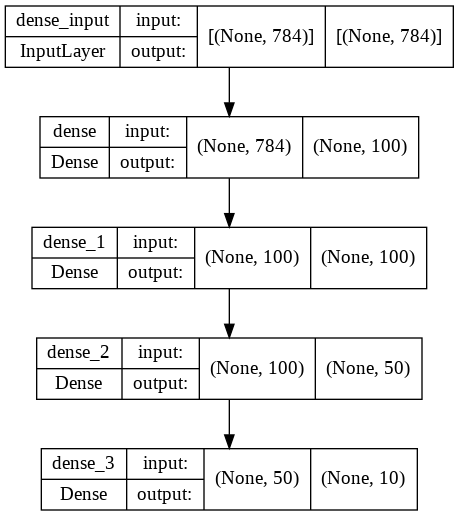

In [11]:
#model summary iin img
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot_CNN.png', show_shapes=True, show_layer_names=True)

Shape of First Layer (784, 100)
Visualization of First Layer


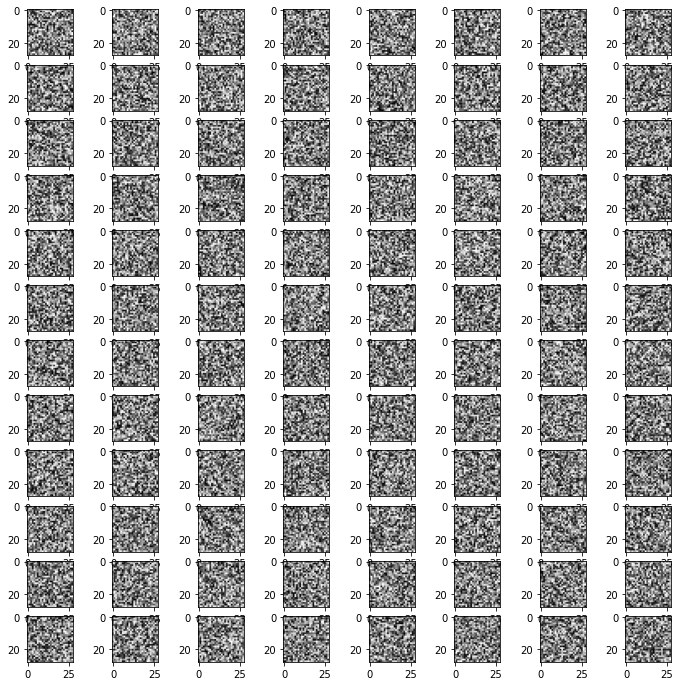

In [12]:
#Weights before training
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()
#first layer pe esi image banti h

In [13]:
#Model compilation
from tensorflow.keras.optimizers import RMSprop
#categorical_crossentropy  :use due to multiclass classification
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=["accuracy"])

In [14]:
# Write the Training input and output variables, size of the batch, number of epochs
history = model.fit(X_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2)

Epoch 1/25
469/469 - 4s - loss: 0.3243 - accuracy: 0.9060 - 4s/epoch - 9ms/step
Epoch 2/25
469/469 - 1s - loss: 0.1331 - accuracy: 0.9601 - 1s/epoch - 3ms/step
Epoch 3/25
469/469 - 1s - loss: 0.0943 - accuracy: 0.9711 - 1s/epoch - 3ms/step
Epoch 4/25
469/469 - 1s - loss: 0.0739 - accuracy: 0.9770 - 1s/epoch - 3ms/step
Epoch 5/25
469/469 - 1s - loss: 0.0594 - accuracy: 0.9821 - 1s/epoch - 3ms/step
Epoch 6/25
469/469 - 1s - loss: 0.0486 - accuracy: 0.9852 - 1s/epoch - 3ms/step
Epoch 7/25
469/469 - 1s - loss: 0.0401 - accuracy: 0.9873 - 1s/epoch - 3ms/step
Epoch 8/25
469/469 - 1s - loss: 0.0339 - accuracy: 0.9894 - 1s/epoch - 3ms/step
Epoch 9/25
469/469 - 1s - loss: 0.0294 - accuracy: 0.9907 - 1s/epoch - 3ms/step
Epoch 10/25
469/469 - 1s - loss: 0.0249 - accuracy: 0.9920 - 1s/epoch - 3ms/step
Epoch 11/25
469/469 - 1s - loss: 0.0205 - accuracy: 0.9931 - 1s/epoch - 3ms/step
Epoch 12/25
469/469 - 1s - loss: 0.0185 - accuracy: 0.9938 - 1s/epoch - 3ms/step
Epoch 13/25
469/469 - 1s - loss: 0.01

In [ ]:
# save model and architecture to single file
model.save('/content/drive/My Drive/AI Masterclass/MNISTANN.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 94,160
Trainable params: 94,160
Non-trainable params: 0
_________________________________________________________________


dict_keys(['loss', 'accuracy'])


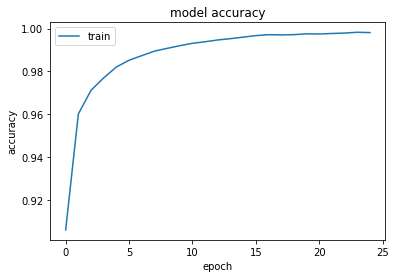

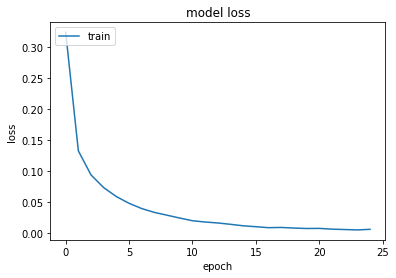

In [15]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#after 15 epoch accuracy is almost constant

In [ ]:
# Loading saved model from Drive.
from keras.models import load_model
model = load_model('/content/drive/My Drive/AI Masterclass/MNISTANN.h5')
print("Model is Loaded")
model.summary()

Model is Loaded
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 94,160
Trainable params: 94,160
Non-trainable params: 0
_________________________________________________________________


In [16]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")
#overfitting : training accuracy > testing accuracy

[INFO] Calculating model accuracy
313/313 [==============================] - 1s 3ms/step - loss: 0.1914 - accuracy: 0.9735
Test Accuracy: 97.35000133514404


In [17]:
#Trainig accuracy
#predicted value
y_pred=model.predict(X_train)

y_pred=np.argmax(y_pred,axis=1)
print(y_pred)
print(y_pred.shape)

[5 0 4 ... 5 6 8]
(60000,)


In [18]:
# Original Training  label
y_train_original=np.argmax(y_train,axis=1)
print(y_train_original)

[5 0 4 ... 5 6 8]


In [19]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_train_original, y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_train_original, y_pred))

Classification report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       1.00      1.00      1.00      5958
           3       1.00      1.00      1.00      6131
           4       1.00      0.99      1.00      5842
           5       1.00      1.00      1.00      5421
           6       1.00      1.00      1.00      5918
           7       1.00      0.97      0.98      6265
           8       1.00      1.00      1.00      5851
           9       0.96      1.00      0.98      5949

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000

Confusion matrix 
[[5923    0    0    0    0    0    0    0    0    0]
 [   0 6742    0    0    0    0    0    0    0    0]
 [   9    0 5948    1    0    0    0    0    0    0]
 [   3    0    2 6124    0    1    0    0

In [20]:
# testing accuracy
#predicted value
y_pred=model.predict(X_test)

y_pred=np.argmax(y_pred,axis=1)
print(y_pred)
print(y_pred.shape)

[7 2 1 ... 4 5 6]
(10000,)


In [21]:
# Original testing Label
y_test_original=np.argmax(y_test,axis=1)
y_test_original

array([7, 2, 1, ..., 4, 5, 6])

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_test_original, y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_test_original, y_pred))


Classification report 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.93      0.96      1028
           8       0.98      0.97      0.97       974
           9       0.92      0.99      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion matrix 
[[ 972    0    1    1    0    0    3    1    0    2]
 [   0 1124    4    1    0    1    2    1    2    0]
 [   8    1 1008    2    1    0    3    4    3    2]
 [   0    0    6  989    0    3    0    3

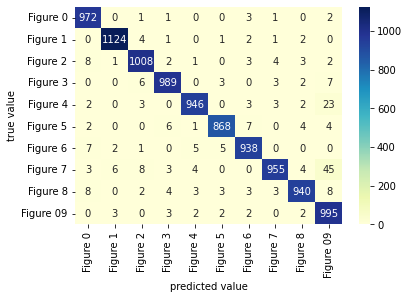

In [24]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test_original,y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g', xticklabels=['Figure 0','Figure 1','Figure 2','Figure 3','Figure 4','Figure 5','Figure 6','Figure 7','Figure 8','Figure 09'], 
            yticklabels=['Figure 0','Figure 1','Figure 2','Figure 3','Figure 4','Figure 5','Figure 6','Figure 7','Figure 8','Figure 09']); 

plt.xlabel('predicted value')
plt.ylabel('true value');

Shape of First Layer (784, 100)
Visualization of First Layer


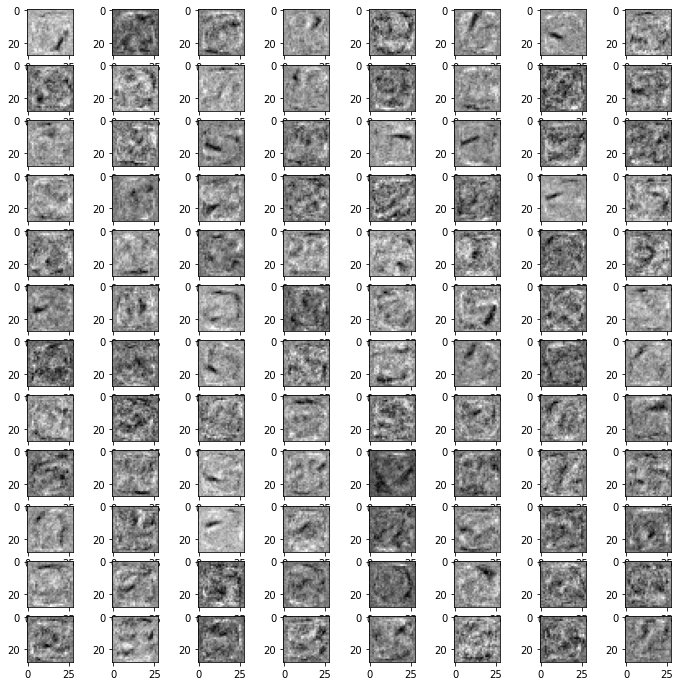

In [23]:
# Weights after training of First layer
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

In [25]:
# Write the testing input and output variables
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1914486587047577
Test accuracy: 0.9735000133514404


Label: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


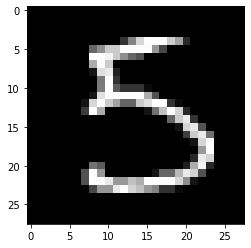

In [26]:
#we take image of 15th no.
print("Label:",y_test[15:16])
plt.imshow(X_test[15:16].reshape(28,28), cmap='gray')
plt.show()

In [27]:
# Write the index of the test sample to test
prediction = model.predict(X_test[15:16])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

Prediction
 [2.7866681e-27 1.7032296e-26 9.7721494e-24 4.9982396e-10 1.9711760e-31
 1.0000000e+00 9.0560354e-20 1.0447417e-23 1.9050482e-17 1.9247701e-18]

Thresholded output
 [0 0 0 0 0 1 0 0 0 0]


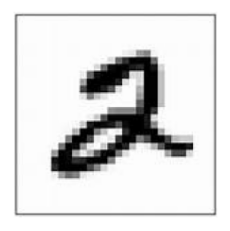

In [31]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image in color
image_bgr = cv2.imread("/content/2.png", cv2.IMREAD_COLOR)
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

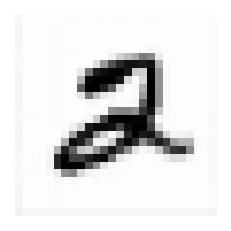

In [32]:
# Load image as grayscale

# Write the path to the image 
image = cv2.imread("/content/2.png", cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28, 28)) 
# Show image
plt.imshow(image_resized, cmap='gray'), plt.axis("off")
plt.show()

In [33]:
prediction = model.predict(image_resized.reshape(1,784))
print(prediction)
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:',np.where(thresholded == 1)[1][0])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Prediction Score:
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]

Thresholded Score:
 [0 0 1 0 0 0 0 0 0 0]

Predicted Digit: 2
